In [54]:
# default_exp reduction
# default_cls_lvl 2

# Chapter 8. Dimensionality Reduction
>

- Many ML problems will involve thousands or even millions of features per instance.
- Not only all of these features make training extremly slow, but they can also make it much harder for an optimization method to find a good solution.
- This problem is often referred to as the **curse of dimensionality**.
- In real world problem, it is often possible to reduce the number of features considerably.
    - Turning an intractable problem into a tractable one.
- The goal is to remove the maximum number of features while minimizing information loss that relates to a specific task
    - Task example — Classifying MNIST digits.
- Reducing dimensionality does cause some information loss.
- It also makes your pipeline a bit more complex and thus harder to maintain.
- Dimensionality reduction is usually conducted to **speed up training**.
- Dimensionality reduction is also extremly useful for data visualization.
    - Taking it down to 2/3 dimensions for your data set will allow you visualize it in a 2/3D space.
- DataViz is also important to communicate your findings to people who are not data scientists.
    - In Particular, decision makers who will use your results.

- In this chapter we will:
    - Discuss the curse of dimenstionality.
    - Get a sense of what goes on in a high-dimenstional space.
    - Consider the main two approaches to dimensionality reduction:
        - Projection
        - Manifold Learning
    - Go through 3 popular dimensionality reduction techniques:
        - PCA
        - Kernel PCA
        - LLE

## The Curse of Dimensionality

- We are so used to living in three dimensions
    - 4 if you consider time, and a few more if you are a string theorist.
- It turns out that many things behave very differently in high-dimensional spaces.
- If you pick a random point in a unit square, it will have ~0.4% chance of being located at <0.001 from a border.
- But in a 1,000-dimensional hyper-cube the probability is >99.999999%.
    - Most points in a high-dimensional space are very close to the border.
- Same goes to distances betweeen points, If you pick two random points in a lower dimensional space, they will be closer in comparison to picking them from a high-dimensional space.
- **There is just plenty of space in a high-dimensional one!**
- High-dimensional datasets are at risk of being too sparse.
- The most dimensions a dataset has, the more risk it is to overfit it.

## Main Approaches to Dimensionality Reduction

### Projection

- In most real-world problems, training instances are not spread out uniformly across the dimensions.
    - Many features are almost constant, while others are highly correlated.
- As a result, all training instances like close to a much-lower dimensional **subspace** of the high-dimensional space.
- Here is an example of that:

<div style="text-align:center;">
    <img style="width:50%" src="static/imgs/subspace_projection.png" />
</div>

- If we perpenducarly project every training instance into the subspace, we get a new 2D dataset represented as follows:

<div style="text-align:center;">
    <img style="width:50%" src="static/imgs/2d_projection.png" />
</div>

- However, projection is not always to best approach to dimensionality reduction.
    - In many case the subspace may twist & turn.

### Manifold Learning

- A 2D manifold is a 2D shape that can be bent & twisted in a higher-dimensional space.
- More generally, a d-dimensional manifold is part of an n-dimensional space (where d < n), that locally resembles a d-dimensional hyperplace.
- Many dimensionality reduction algorithms work by modeling the manifold on which the training instances lie, this is called **Manifold Learning**.
    - It relies on the *manifold assumption*, also called the *manifold hypothesis*.
        - Which holds that most real world high-dimensional datasets lie close to a much lower-dimensional manifold.
            - **This assumption is very often empirically observed**.
- Thought experiment
    - If you were to generate random images on a 28x28 grid, only a very small fraction of them would look like handwritten digits.
    - In other words, the degrees of freedom available to you if you were to create a digit image are very low compared to the degree of freedom you have when you want to create any image you want (random).
    - **These constraints tend to squeeze the dataset into a lower-dimensional manifold**.
- An implicit additional assumption is that the task at hand (being regression or classification) would be much easier if conducted on the lower dimensional manifold space.
    - This assumption does not always hold.
    - Examples to follow:

<div style="text-align:center;">
    <img style="width:50%" src="static/imgs/manifold_classification.png" />
</div>

- In short, reducing the dimensionality of your dataset will speed up training, but it doesn't guarantee a simpler solution.
    - It all depends on the dataset and the task at hand.
- Now we will go through some of the most popular dimensionality reduction algorithms.

## PCA

- Principal Component Analysis is by far the most popular dimensionality reduction algorithm.
- First, **It identifies the hyperplane that lies closest to the data**.
- Then, **It projects the data into it**.

### Preserving the Variance

- We want to choose a hyperplace that most preserves tha variance within the data, following is attempted projections for 3 chosen hyperplanes (1D axis):

<div style="text-align:center;">
    <img style="width:66%" src="static/imgs/2D_variance_projection.png" />
</div>

- It seems reasonable to select the axis that preserves the maximum amount of variance.
    - As it will most likely lose less information than other projections.
- Another way of looking at it is by choosing the solid line axis, we are minimizing the mean squared distance between the original points and their projections into the chosen axis.
    - This is the rather simple idea behind PCA.

### Principle Components

- PCA identifies the axis that accounts for the largest amount of variance in the training set.
- It also finds a second axis, orthogonal to the first one, that accounts for the largest amount of remaining variance.
- If we're considering a higher-dimensional dataset, PCA would also find a third axis, and a fourth, and a fifth, and so on...
    - As many axes as the number of dimensions in the dataset.
- The ith axis is called the ith **principal component** of the data.
- So how can you find the principal components of a training set?
- There is a standard matrix vectorization technique called *Singular Value Decomposition (SVD)*
    - It can decompose the training set $X$ into $X=U \Sigma V^T$
    - $V$ contains the unit vectors that define all the principal components that we are looking for:
    
$$V=
  \begin{pmatrix}
    \vert & \vert & \dots & \vert \\
    c_1 & c_2 & \dots & c_n \\
    \vert & \vert & \dots & \vert \\
  \end{pmatrix}
$$

- let's extract the principal components of a dataset using numpy's `svd` implementation:

- Let's start by generating some data:

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [56]:
X = np.linspace(start=-1., stop=1., num=100)
y = X + np.random.normal(size=100)/7.
X.shape, y.shape

((100,), (100,))

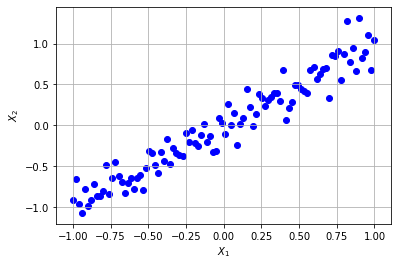

In [57]:
plt.scatter(X, y, c='blue')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.grid()
plt.show()

In [58]:
X = np.concatenate((X[..., None], y[..., None]), axis=1)
X.shape

(100, 2)

In [59]:
X_centered = X - X.mean(axis=0)

In [60]:
U, s, Vt = np.linalg.svd(a=X_centered)

In [61]:
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [62]:
c1, c2

(array([0.69935542, 0.71477409]), array([ 0.71477409, -0.69935542]))

- These two 2D points represent the unit vector points (origin at (0,0)) corresponding to the 2 principal components (axes that preserve variance).
- PCA assumes that the dataset is centered around the origin, but scikit-learn implementation takes care of centering the data for you.

### Projecting down to $d$ Dimensions

- Once you have identified all the principal components, you can reduce the dimensionality of the dataset down to $d$ dimensions by projecting it onto the hyperplane defined by the first $d$ principal components.
- Selecting this hyperplane ensures that the projection will preserve as much variance as possible.
- To Project the training set into the hyperplane and obtain a reduced dataset $X_{d-proj}$ of dimensionality $d$:
    - Compute the matrix multiplication of the training set matrix $X$ by the matrix $W_{d}$ 
        - $W_{d}$ is the matrix containing the first $d$ columns of $V$ representing the principal components.

$$X_{d-proj}=XW_d$$

- Let's do it in Python:

In [63]:
W2 = Vt.T[:, :2]

In [64]:
X2D = X_centered.dot(W2)
X2D.shape

(100, 2)

### Using Scikit-Learn

In [65]:
from sklearn.decomposition import PCA

In [67]:
pca = PCA(n_components=2)

In [68]:
X2D = pca.fit_transform(X)

In [77]:
assert np.all(np.abs(pca.components_) == np.abs(W2))

### Explained Variance Ratio

- The ratio indicates the proportion of the dataset's variance lying along each principal component.
- Let's take a look at it for our scikit-learn learner:

In [78]:
pca.explained_variance_ratio_, np.sum(pca.explained_variance_ratio_)

(array([0.98264719, 0.01735281]), 1.0)

### Choosing the Right Number of Dimensions

- Choose the number of dimensions that add up to a large portion of the variance that lied within the original dataset.
    - Example: $>=95\%$
- Unless, ofcoures, you are reducing dimensionality to visualize the data.
    - In that case you will want to reduce the data down to 2/3 axis.
- Let's do it in scikit-learn:

In [79]:
pca = PCA()

In [80]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [81]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

In [82]:
d = np.argmax(cumsum >= .95) + 1

In [83]:
d

1

- Then re-run PCA training using $d$.
- But there is a much better option, that of specifying a float for `n_components` as the ratio of variance we want to preserve.

In [84]:
pca = PCA(n_components=0.95)

In [85]:
X_reduced = pca.fit_transform(X)

### `PCA` for Compression 

- After dimensionality reduction, the training set takes much less space.
- It is also possible to decompress the reduced dataset back to $784$ (in the case of MNIST) by applying **the inverse transformation of the PCA projection**.
    - **This won't give you back the original data since 5% of the variance was lost while compressing**.
    - But it will likely be close to the original dataset.
- **The mean squared distance between the original dataset and the decompressed dataset is called the Reconstruction Error**.
- Let's do it with scikit-learn:

In [86]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [87]:
X, y = datasets.fetch_openml(name='mnist_784', return_X_y=True)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [89]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((46900, 784), (23100, 784), (46900,), (23100,))

In [90]:
pca = PCA(n_components=154)

In [91]:
X_reduced = pca.fit_transform(X_train)

In [92]:
X_recovered = pca.inverse_transform(X_reduced)

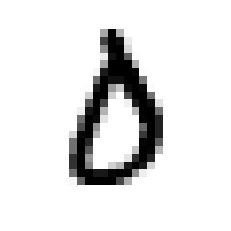

In [93]:
plt.imshow(X_train[0].reshape(28, 28), cmap='binary')
plt.axis('off')
plt.show()

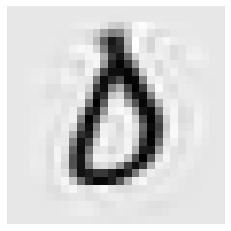

In [94]:
plt.imshow(X_recovered[0].reshape(28, 28), cmap='binary')
plt.axis('off')
plt.show()

- Following is the equation of the inverse transformation:

$$X_{recovered}=X_{d-proj}W_{d}^{T}$$

### Randomized PCA

- We can use a stochastic algorithm called *Randomized PCA* that quickly finds an approximation of the first $d$ principal components.
- Its computational complexity is $O(m \times d^{2})+O(d^3)$ instead of SVD's $O(m \times n^{2})+O(n^3)$.
- So it's dramatically faster then SVD when $d << n$.
- Let's use it with `scikit-learn`:

In [27]:
rnd_pca = PCA(n_components=154, svd_solver='randomized')

In [28]:
X_reduced = rnd_pca.fit_transform(X_train)

### Incremental PCA

- One problem with the previous implementations of PCA is that they require the whole training data to fit in memory.
- Fortunately, **incremental PCA** algorithms have been developed.
- They allow us to split the training set in mini-batches and feed them one at a time to the IPCA algorithm.
- This is useful when having large training sets or doing online learning.
- Let's experiment with incremental PCA using scikit-learn:

In [29]:
from sklearn.decomposition import IncrementalPCA

In [30]:
n_batches = 100
inc_pca = IncrementalPCA(n_components=154)

In [31]:
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

In [32]:
X_reduced = inc_pca.transform(X_train)

- We can also mimic normal fitting behavior by using the `memap` class to store our training data:

## Kernel PCA

- Recall that a linear decision boundary in a high-dimensional space corresponds to a non-linear decision boundary in the original low-dimensional space.
- It turns out that the "kernel trick" can also be applied to PCA.
- Making it possible to perform complex non-linear projections for dimensionality reduction.
- It's often **good at preserving clusters of instances after projecting them**.
- Let's use kPCA in scikit-learn:

In [33]:
from sklearn.decomposition import KernelPCA

In [40]:
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)

In [ ]:
X_reduced = rbf_pca.fit_transform(X)

### Selecting a Kernel and Tuning Hyperparameters

- *Note: Use a GPU*
- As kPCA is an unsupervised learning algorithm, there is no obvious performance measure to help you select the best kernel and hyper-parameter values.
- That said, dimensionality reduction is often a pre-processing step for a supervised learning task.
- So you can use grid search to select the kernel and hyper-parameters that lead to the best performance on the end task.
- The following scikit-learn example create a two step pipeline:
    - First reducing the dimensionality to 2 dimensions using kPCA.
    - Then Applying logistic regression for classification.
- Then we use `GridSearchCV` to find the best **kernel** and **gamma** value for kPCA in order to get the best classification accuracy at the end of the pipeline.

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [35]:
clf = Pipeline([
    ('kpca', KernelPCA(n_components=2)),
    ('log_reg', LogisticRegression())
])

In [36]:
param_grid = [{
    "kpca__gamma": np.linspace(0.03, 0.05, 10),
    "kpca__kernel": ["rbf", "sigmoid"]
}]

In [37]:
grid_search = GridSearchCV(clf, param_grid, cv=3)

In [ ]:
grid_search.fit(X, y)

In [ ]:
grid_search.best_params_

- Another approach, entirely unsupervised, is to select the kernel and hyper-parameters that **yield the lowest reconstruction error**.
- Let's visualize the steps we take with kernel-based dimensionality reduction:

<div style="text-align:center;">
    <img style="width:50%" src="static/imgs/reconstruction_vis.png" />
</div>

- Notice that when we invert our final transformation, we get instance on the infinite feature space and not the original space.
- Since the feature space is infinite, we cannot compute the reconstruction loss. 
- But it's possible to find a point in the original space that map close to the reconstructed point, this point is called the reconstructed **pre-image**.
- Once you have the pre-image, you can measure its squared distance to the original instance.
- In terms of **how to perform the reconstruction**, You can train a supervised learning algorithm to find a mapping between the original dataset and the reduced data.
- scikit-learn can do it for you with the `fit_inverse_transform` hyper-parameter:

In [39]:
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.0433, fit_inverse_transform=True)

In [ ]:
X_reduced = rbf_pca.fit_transform(X)

In [ ]:
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [40]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(X, X_preimage)

- You can you grid search to find the hyper-parameters that minimize this error.

## LLE

- Locally Linear Embedding is a powerful non-linear dimensionality reduction technique.
- It's a manifold learning technique that doesn't rely on projections like the previous algorithms do.
- LLE works by first measuring how each instance relates to its neighbors
- Then it looks for low-dimensional representation of the training set where each local relationship is best preserved.
- Let's use it with scikit-learn:

In [41]:
from sklearn.manifold import LocallyLinearEmbedding

In [42]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)

In [ ]:
X_reduced = lle.fit_transform(X)

- The resulting 2D dataset is shown as follows:

<div style="text-align:center;">
    <img style="width:50%" src="static/imgs/swiss_unroll.png" />
</div>

- LLE did a pretty good job at modeling the manifold.
- ...